In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as pl
import seaborn as sns
pl.style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)
import missingno as msno

In [2]:
import pandas as pd

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [4]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [6]:
train.shape,test.shape

((10886, 12), (6493, 9))

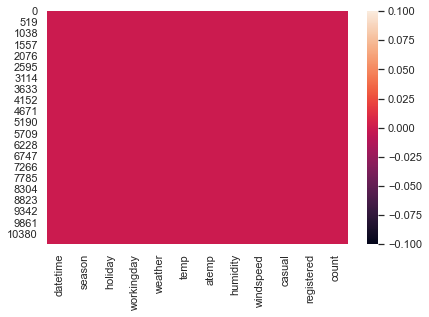

In [7]:
sns.heatmap(train.isnull())

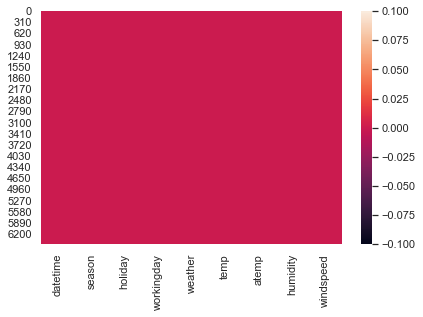

In [8]:
sns.heatmap(test.isnull())

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


# missingno is library to check for missing vlaues

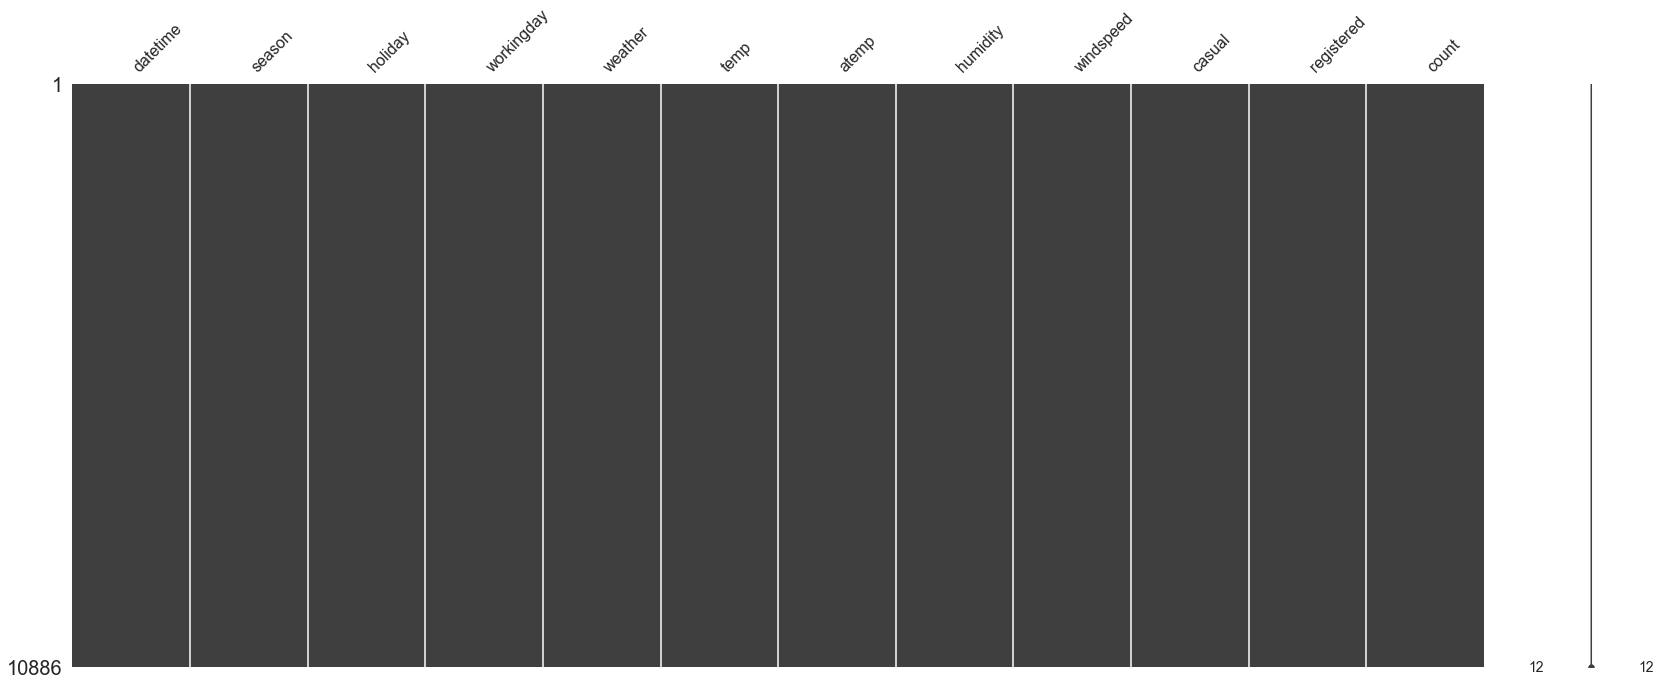

In [10]:
msno.matrix(train)

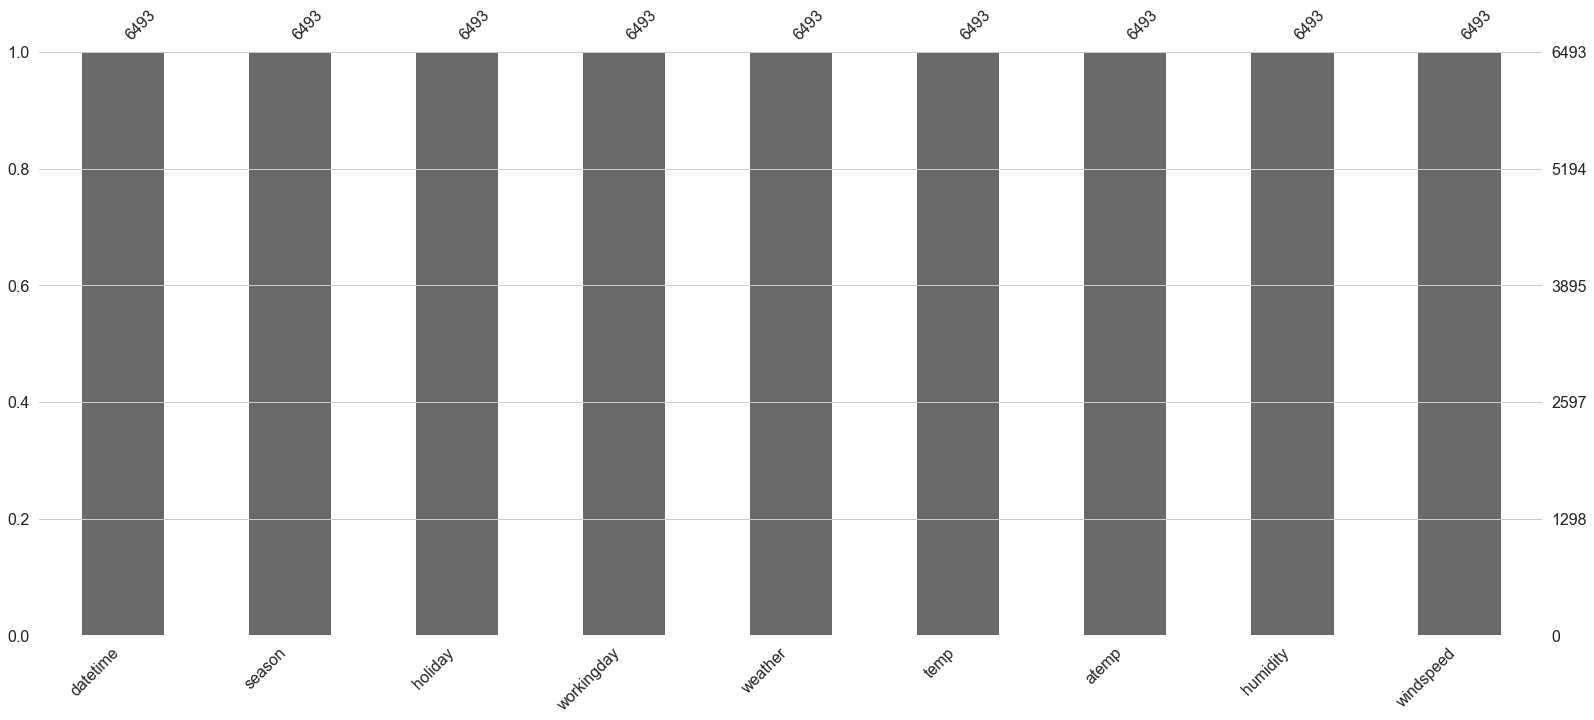

In [11]:
msno.bar(test)

In [12]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

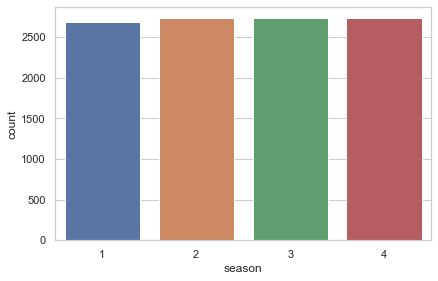

In [13]:
sns.countplot(train['season'])

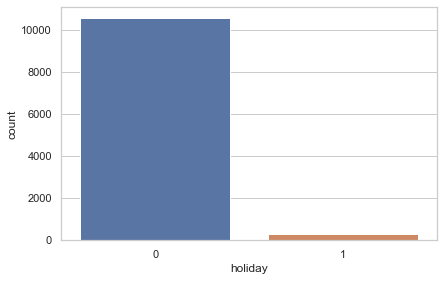

In [14]:
sns.countplot(train['holiday'])

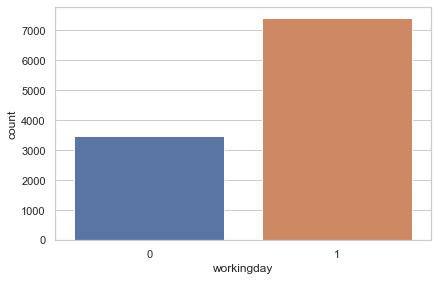

In [15]:
sns.countplot(train['workingday'])

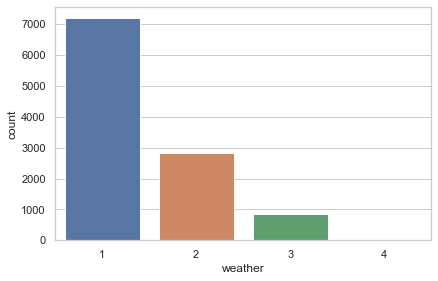

In [16]:
sns.countplot(train['weather'])

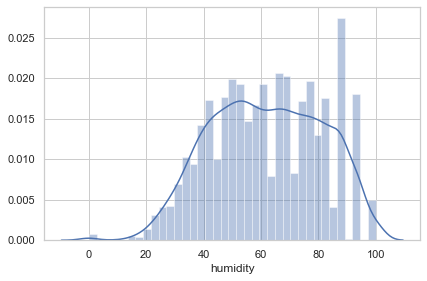

In [17]:
sns.distplot(train['humidity'])

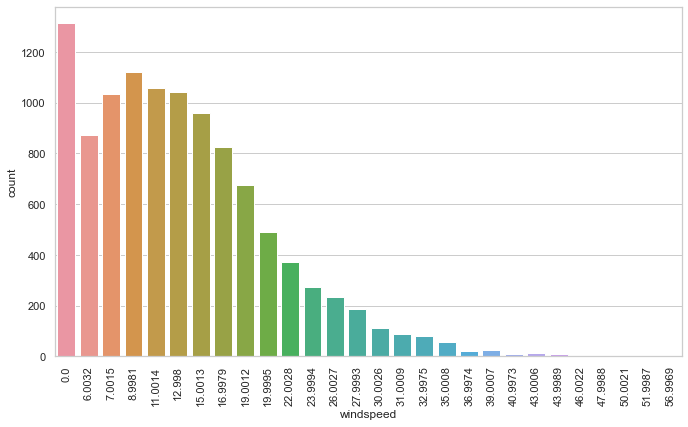

In [18]:
pl.figure(figsize=(10,6))
sns.countplot(train['windspeed'])
pl.xticks(rotation=90)
pl.show()

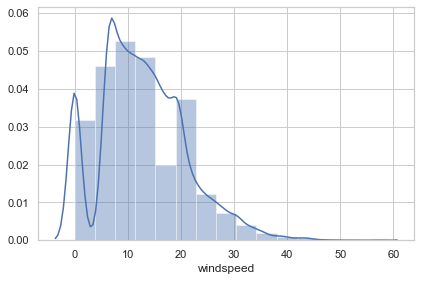

In [19]:
sns.distplot(train['windspeed'],bins=15)

(array([1.313e+03, 4.083e+03, 2.827e+03, 1.540e+03, 6.960e+02, 2.800e+02,
        1.070e+02, 3.100e+01, 6.000e+00, 3.000e+00]),
 array([ 0.     ,  5.69969, 11.39938, 17.09907, 22.79876, 28.49845,
        34.19814, 39.89783, 45.59752, 51.29721, 56.9969 ]),
 <a list of 10 Patch objects>)

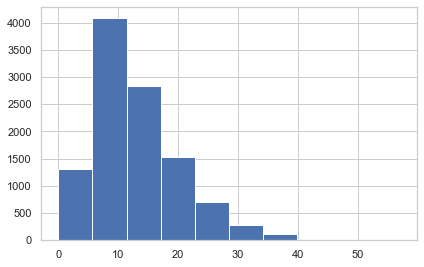

In [20]:
pl.hist(train['windspeed'])

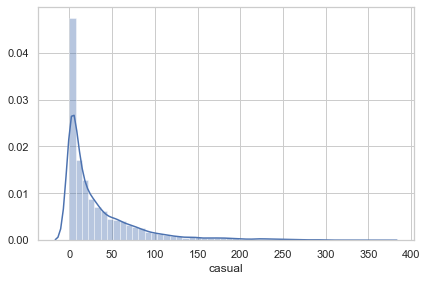

In [21]:
sns.distplot(train['casual'])

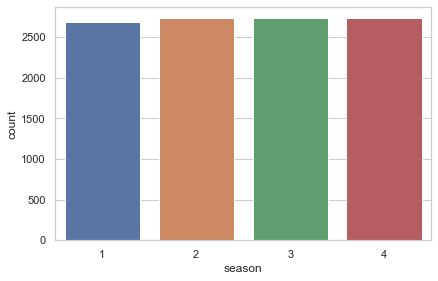

In [22]:
sns.countplot(train['season'])

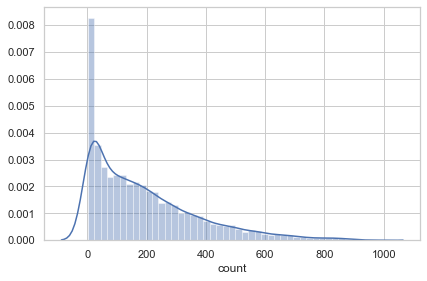

In [23]:
sns.distplot(train['count'])

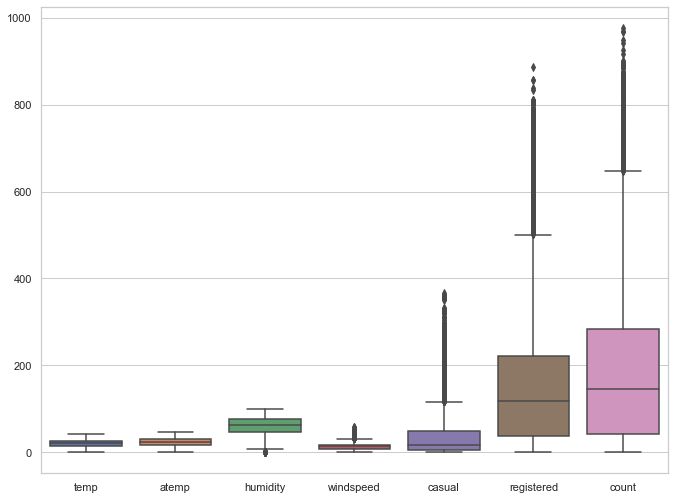

In [24]:
pl.figure(figsize=(10,8))
sns.boxplot(data=train[['temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']])
fig=pl.gcf()
# fig.set_size_inches(10,8)

In [25]:
corr_mat=train.corr()
mask=np.array(corr_mat)
mask[np.tril_indices_from(mask)]=False

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

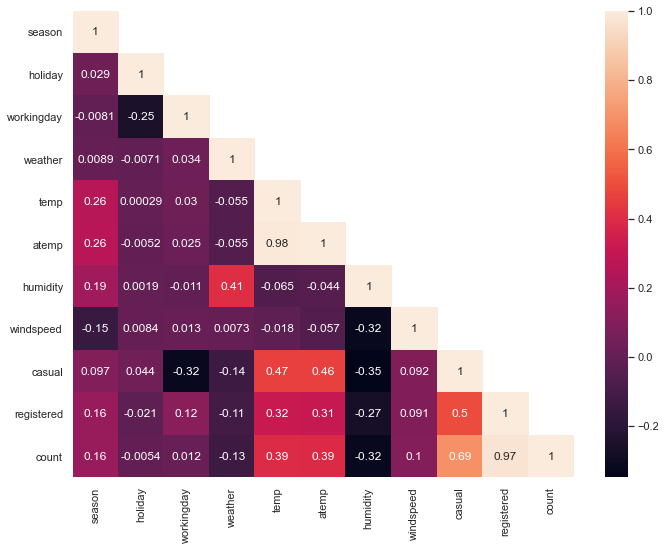

In [26]:
pl.figure(figsize=(10,8))
sns.heatmap(data=corr_mat,mask=mask,annot=True)

In [27]:
season=pd.get_dummies(train['season'],prefix='season')
train=pd.concat([train,season],axis=1)
season=pd.get_dummies(test['season'],prefix='season')
test=pd.concat([test,season],axis=1)

In [28]:
season=pd.get_dummies(train['weather'],prefix='weather')
train=pd.concat([train,season],axis=1)
season=pd.get_dummies(test['weather'],prefix='weather')
test=pd.concat([test,season],axis=1)

In [29]:
train.drop(['season','weather'],axis=1)
test.drop(['season','weather'],axis=1)

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-20 00:00:00,0,1,10.66,11.365,56,26.0027,1,0,0,0,1,0,0,0
1,2011-01-20 01:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
2,2011-01-20 02:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
3,2011-01-20 03:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0
4,2011-01-20 04:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,0,1,10.66,12.880,60,11.0014,1,0,0,0,0,1,0,0
6489,2012-12-31 20:00:00,0,1,10.66,12.880,60,11.0014,1,0,0,0,0,1,0,0
6490,2012-12-31 21:00:00,0,1,10.66,12.880,60,11.0014,1,0,0,0,1,0,0,0
6491,2012-12-31 22:00:00,0,1,10.66,13.635,56,8.9981,1,0,0,0,1,0,0,0


In [30]:
train['hour']=[t.hour for t in pd.DatetimeIndex(train['datetime'])]
train['day']=[t.dayofweek for t in pd.DatetimeIndex(train['datetime'])]
train['month']=[t.month for t in pd.DatetimeIndex(train['datetime'])]
train['year']=[t.year for t in pd.DatetimeIndex(train['datetime'])]
train['year']=train['year'].map({2011:0,2012:1})
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,0,0,1,0,0,0,0,5,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,0,0,1,0,0,0,1,5,1,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,0,0,1,0,0,0,2,5,1,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,0,0,1,0,0,0,3,5,1,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,0,0,1,0,0,0,4,5,1,0


In [31]:
test['hour']=[t.hour for t in pd.DatetimeIndex(test['datetime'])]
test['day']=[t.dayofweek for t in pd.DatetimeIndex(test['datetime'])]
test['month']=[t.month for t in pd.DatetimeIndex(test['datetime'])]
test['year']=[t.year for t in pd.DatetimeIndex(test['datetime'])]
test['year']=test['year'].map({2011:0,2012:1})
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,season_1,...,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,1,...,0,0,1,0,0,0,0,3,1,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,...,0,0,1,0,0,0,1,3,1,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,...,0,0,1,0,0,0,2,3,1,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,...,0,0,1,0,0,0,3,3,1,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,...,0,0,1,0,0,0,4,3,1,0


In [32]:
train.drop('datetime',axis=1,inplace=True)
test.drop('datetime',axis=1,inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

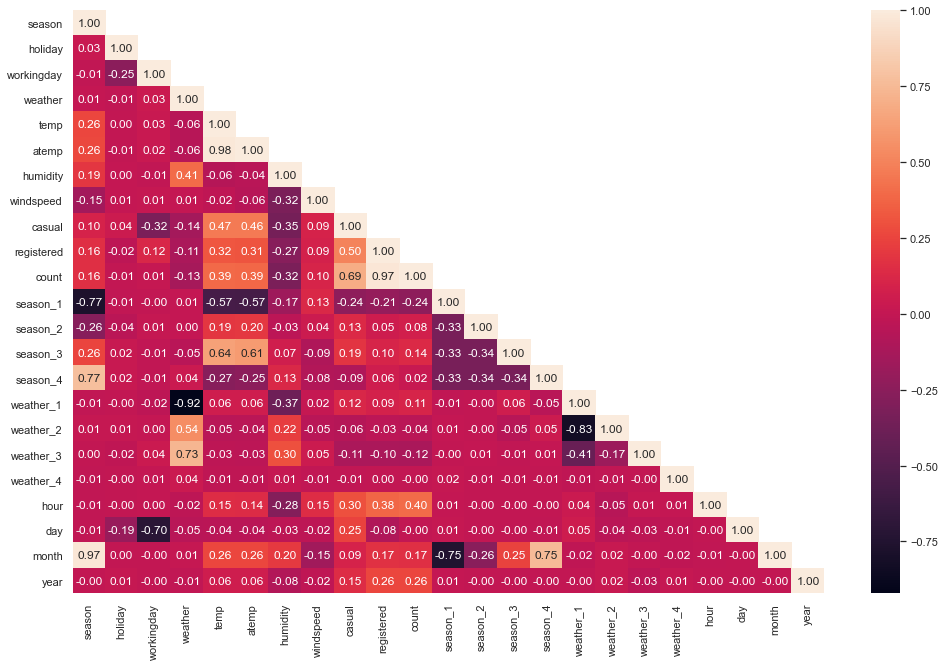

In [33]:
pl.figure(figsize=(15,10))
corr_mat=train.corr()
mask=np.array(corr_mat)
mask[np.tril_indices_from(mask)]=False
sns.heatmap(data=corr_mat,mask=mask,annot=True,fmt='.2f')
pl.show()

In [34]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [35]:
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [36]:
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

In [37]:
models=[RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),
       SVR(),KNeighborsRegressor()]
model_names=['RandomForestRegresser','AdaBoostRegressor','BaggingRegressor','SVR','KNeighborsRegressor']
rmsle=[]
for model in models:
    classifier=model
    classifier.fit()